# 1.資料載入
將資料下載到本地，再上傳到Colab，一共會有四個檔案
* data_description.txt : 資料說明
* sample_submission.csv : 結果上傳範例
* test.csv : 測試資料，有所有X變數，但沒有Y
* train.csv : 訓練資料，有所有X變數及Y

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print("訓練資料維度 : {} ".format(train.shape))
print("測試資料維度 : {} ".format(test.shape))

訓練資料維度 : (1460, 81) 
測試資料維度 : (1459, 80) 


## 1.1觀察資料欄位
* **SalePrice**：房屋銷售價格（美元），此為目標變數
* **MSSubClass**：建築分類
* **MSZoning**：一般分區分類
* **LotFrontage**：與街道連接的房屋街道前寬（線性英尺）
* **LotArea**：地塊面積（平方英尺）
* **Street**：道路接入類型
* **Alley**：巷道接入類型
* **LotShape**：地塊的整體形狀
* **LandContour**：地塊的平整度
* **Utilities**：可用的公共設施類型
* **LotConfig**：地塊配置
* **LandSlope**：地塊的坡度
* **Neighborhood**：房屋所在的具體地點（位於Ames市內）
* **Condition1**：靠近主要道路或鐵路的情況
* **Condition2**：靠近主要道路或鐵路的情況（如有第二個）
* **BldgType**：住宅類型
* **HouseStyle**：住宅風格
* **OverallQual**：整體材料和裝潢質量
* **OverallCond**：整體條件評級
* **YearBuilt**：房屋的原始建造年份
* **YearRemodAdd**：房屋的翻新年份
* **RoofStyle**：屋頂樣式
* **RoofMatl**：屋頂材料
* **Exterior1st**：房屋的外部覆蓋材料
* **Exterior2nd**：房屋的外部覆蓋材料（如有多種材料）
* **MasVnrType**：砌體飾面類型
* **MasVnrArea**：砌體飾面的面積（平方英尺）
* **ExterQual**：外部材料的質量
* **ExterCond**：外部材料的當前狀況
* **Foundation**：房屋的地基類型
* **BsmtQual**：地下室的高度
* **BsmtCond**：地下室的一般狀況
* **BsmtExposure**：地下室是否有走出或花園級牆壁
* **BsmtFinType1**：地下室裝修區域的質量
* **BsmtFinSF1**：地下室類型1的裝修面積（平方英尺）
* **BsmtFinType2**：地下室第二個裝修區域的質量（如存在）
* **BsmtFinSF2**：地下室類型2的裝修面積（平方英尺）
* **BsmtUnfSF**：地下室未裝修的面積（平方英尺）
* **TotalBsmtSF**：地下室的總面積（平方英尺）
* **Heating**：供暖系統類型
* **HeatingQC**：供暖質量和狀況
* **CentralAir**：是否有中央空調
* **Electrical**：電力系統類型
* **1stFlrSF**：一樓面積（平方英尺）
* **2ndFlrSF**：二樓面積（平方英尺）
* **LowQualFinSF**：低質量的裝修面積（所有樓層）
* **GrLivArea**：地面以上的居住面積（平方英尺）
* **BsmtFullBath**：地下室全浴室數量
* **BsmtHalfBath**：地下室半浴室數量
* **FullBath**：地面以上的全浴室數量
* **HalfBath**：地面以上的半浴室數量
* **Bedroom**：地下室以上的臥室數量
* **Kitchen**：廚房數量
* **KitchenQual**：廚房質量
* **TotRmsAbvGrd**：地面以上的總房間數（不包括浴室）
* **Functional**：房屋的功能性評級
* **Fireplaces**：壁爐數量
* **FireplaceQu**：壁爐的質量
* **GarageType**：車庫位置
* **GarageYrBlt**：車庫建造年份
* **GarageFinish**：車庫內部裝修
* **GarageCars**：車庫容納車輛數量
* **GarageArea**：車庫面積（平方英尺）
* **GarageQual**：車庫質量
* **GarageCond**：車庫狀況
* **PavedDrive**：是否有鋪設車道
* **WoodDeckSF**：木質甲板面積（平方英尺）
* **OpenPorchSF**：開放式門廊面積（平方英尺）
* **EnclosedPorch**：封閉式門廊面積（平方英尺）
* **3SsnPorch**：三季門廊面積（平方英尺）
* **ScreenPorch**：帶屏風的門廊面積（平方英尺）
* **PoolArea**：泳池面積（平方英尺）
* **PoolQC**：泳池質量
* **Fence**：圍欄質量
* **MiscFeature**：其他未涵蓋的特殊功能
* **MiscVal**：其他特殊功能的價值（美元）
* **MoSold**：銷售月份
* **YrSold**：銷售年份
* **SaleType**：銷售類型
* **SaleCondition**：銷售條件


# 2.資料探勘
* 資料探勘通常會結合數據視覺化，透過觀察統計圖來評估後續的特徵處理
* 有時候會結合傳統統計方法，或是因果分析來進行探勘

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1觀察Y分布

In [7]:
train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


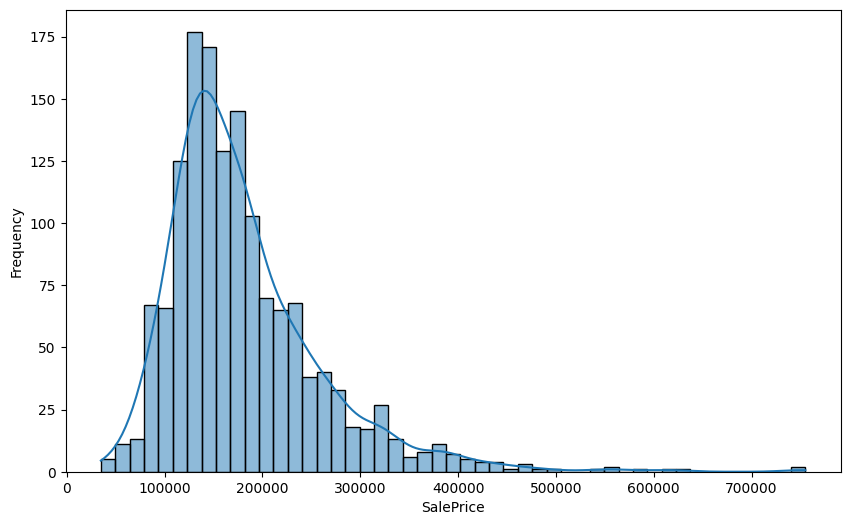

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

* Y的偏斜程度嚴重，可以考慮標準化Y來讓資料貼近常態分布
* 常態分佈的好處可以提高模型準確性、減少誤差，但要注意預測結果需要還原成實際數值

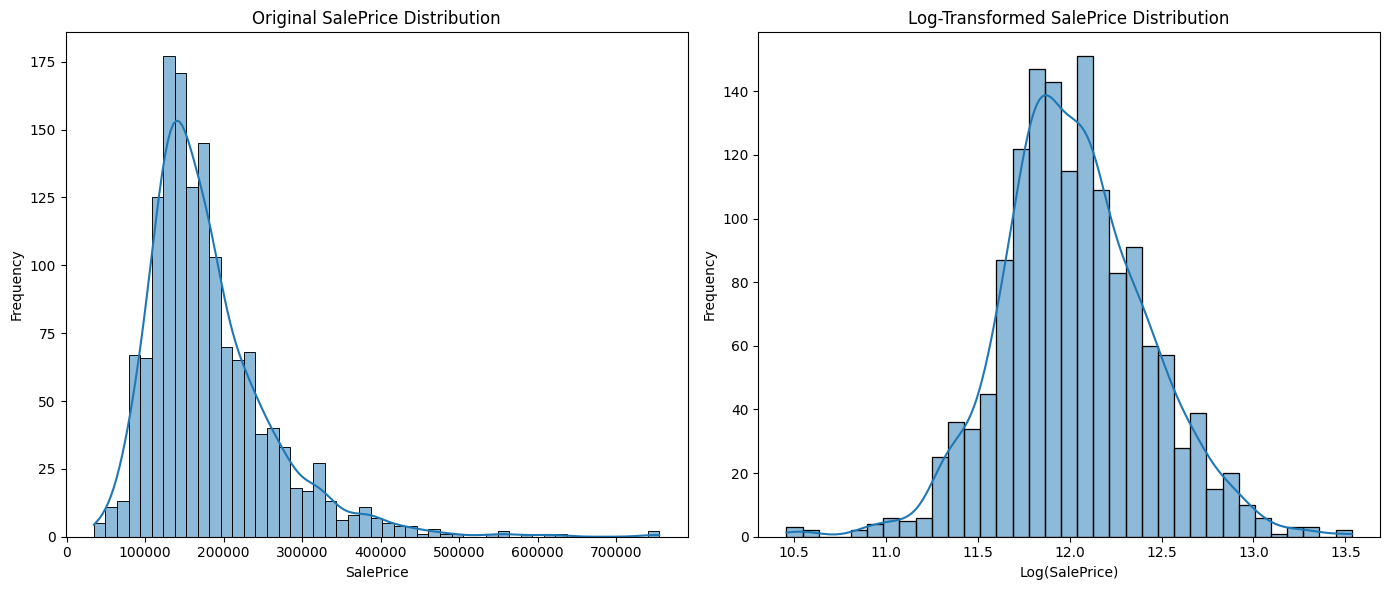

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Original SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

train['SalePrice_log'] = np.log1p(train['SalePrice'])

# 標準化後的 Y 分布圖
plt.subplot(1, 2, 2)
sns.histplot(train['SalePrice_log'], kde=True)
plt.title('Log-Transformed SalePrice Distribution')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.2觀察缺失值

In [10]:
# 計算每個欄位的缺失值數量
missing_values = train.isnull().sum()

# 過濾出有缺失值的欄位並顯示
print('---------缺失值數量---------')
missing_values = missing_values[missing_values > 0]
print(missing_values)
print('---------缺失值比例---------')
missing_percentage = (train.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percentage[missing_percentage > 0])

---------缺失值數量---------
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
---------缺失值比例---------
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


* PoolQC游泳池品質、MiscFeature雜項特徵、Alley巷子類型、Fence圍欄品質、FireplaceQu壁爐品質等，都有大量缺失
* 缺失值過多的欄位可以考慮整個拿掉
* 如果缺失值是有意義的，可能可以透過補0或是補中位數、平均數來處理
* 注意：某些演算法不支持缺失值特徵存在，如標準線性回歸（Linear Regression）、支持向量機（SVM）、K 近鄰算法（KNN）

## 2.3觀察離群值
* 針對數值欄位、類別欄位可以用不同的繪圖來呈現
* 離群值需要考量業務邏輯，來決定是否保留或剃除

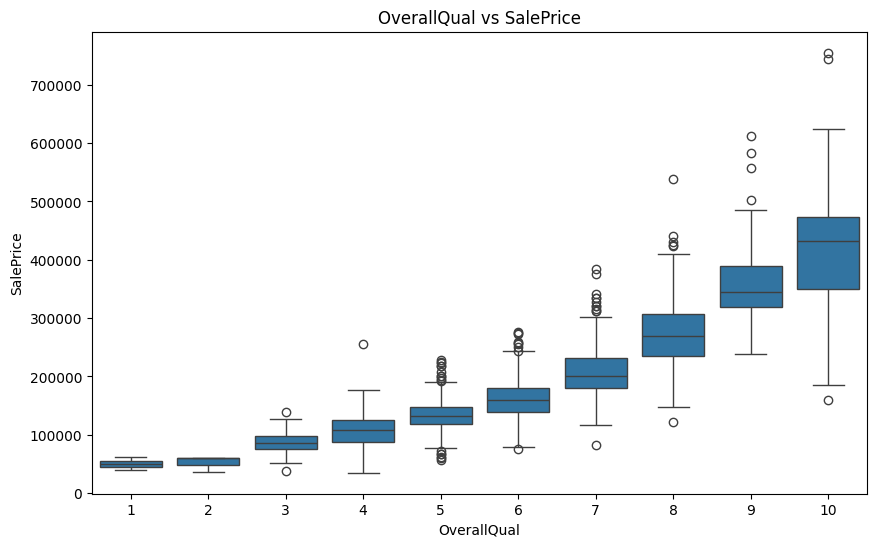

In [11]:
# OverallQual指的是房屋的整體材料評分，介於1-10分，呈現出品質愈好房價越高，離群值的分布也不會太離譜
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()

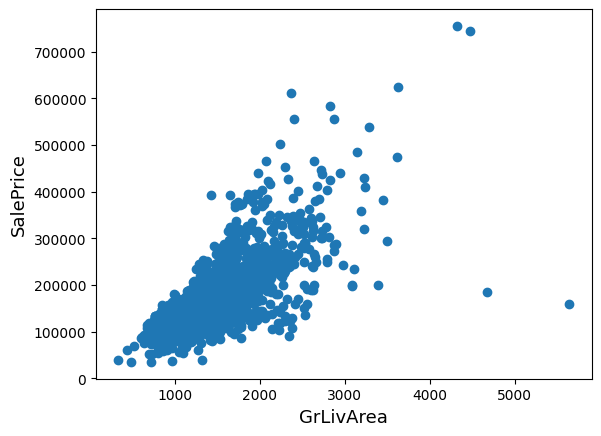

In [12]:
# GrLivArea指的是地面上居住面積，根據想像也是越大房價越高，但有一些不合理離群值出現
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

* 把離群值移除

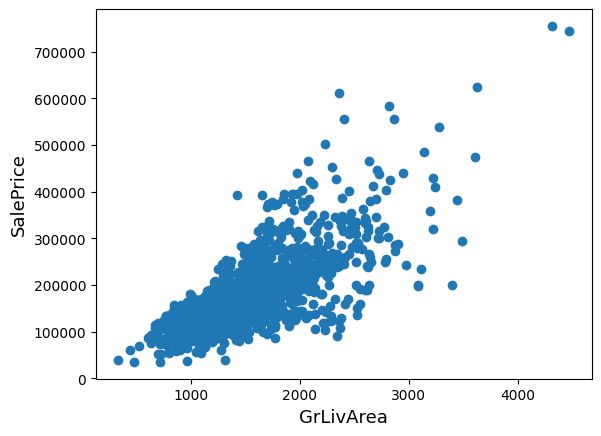

In [13]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 2.4 X、Y的交互關係
* 使用關聯矩陣可以檢視連續型變數與Y的相關性
* 若相關係數太高(接近1或-1)，則可能有共線性問題，會導致某些演算法效果不佳，如標準線性回歸
* 共線性的特徵可以考慮移除其中一項，或是使用正則化(Regularization)處理，如L1、L2

<Axes: >

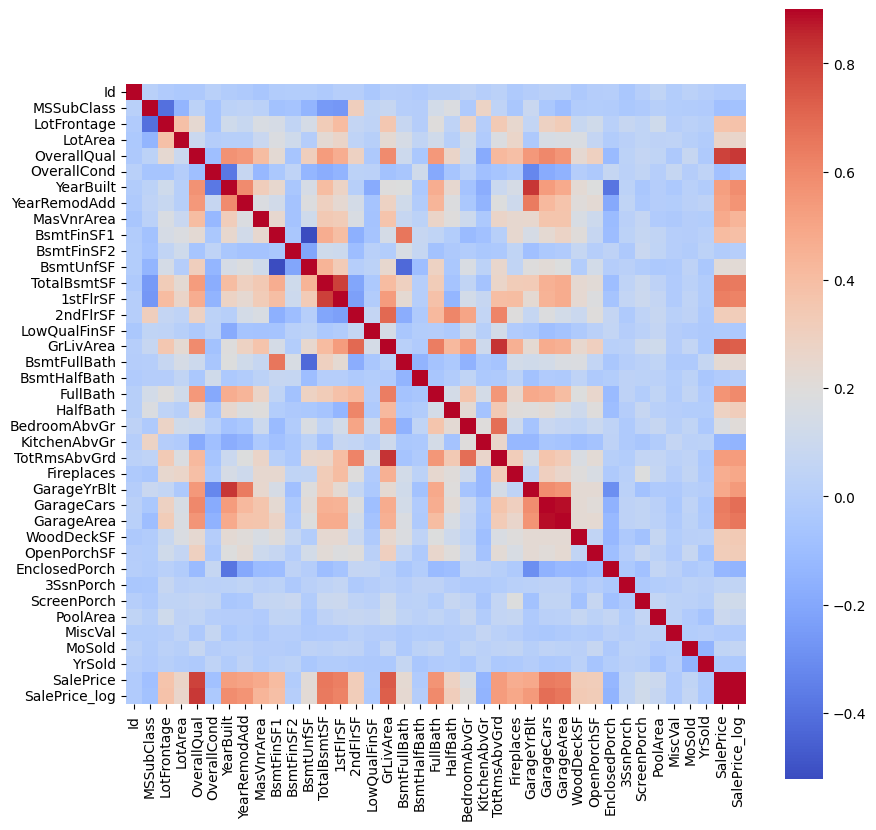

In [14]:
corrmat = train.select_dtypes(include=np.number).corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap="coolwarm")

* OverallQual (0.79)：房屋的材料品質與房價高度相關，有顯著正影響
* GrLivArea (0.71)：地上居住面積也是一個強正相關特徵，面積越大房價通常越高
* GarageCars (0.64) 和 GarageArea (0.62)：車庫大小和容量也顯示出較高的相關性，表明車庫空間對房價的重要性
* TotalBsmtSF (0.61)：地下室總面積對房價有一定影響，擁有地下室的房屋通常價值較高
* 1stFlrSF (0.61)：一樓面積與房價有正相關，這也是房屋空間的一部分
* FullBath (0.56)：完整浴室的數量也有正相關，顯示出對居住舒適度的影響



# 3.特徵工程

* 特徵工程處理不包含Y值，所以可以將訓練資料及測試資料一起處理
* 若分開處理，則要注意測試資料才有的缺失欄位

In [15]:
all_data = pd.concat((train, test)).reset_index(drop=True)
# 去除Y欄位
all_data.drop(['Id','SalePrice','SalePrice_log'], axis=1, inplace=True)
print("合併後的資料集 : {}".format(all_data.shape))

合併後的資料集 : (2917, 79)


In [16]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 3.1缺失值處理

In [17]:
missing_percentage = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percentage[missing_percentage > 0])

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
MasVnrType      60.541652
FireplaceQu     48.680151
LotFrontage     16.660953
GarageYrBlt      5.450806
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrArea       0.788481
MSZoning         0.137127
BsmtHalfBath     0.068564
Utilities        0.068564
BsmtFullBath     0.068564
Functional       0.068564
TotalBsmtSF      0.034282
BsmtFinSF1       0.034282
SaleType         0.034282
BsmtFinSF2       0.034282
GarageCars       0.034282
Exterior2nd      0.034282
Exterior1st      0.034282
GarageArea       0.034282
KitchenQual      0.034282
BsmtUnfSF        0.034282
Electrical       0.034282
dtype: float64


* PoolQC游泳池品質、MiscFeature雜項特徵、Alley巷子類型、Fence圍欄品質、FireplaceQu壁爐品質都有大量缺失值，因此用"None"來取代

In [18]:
columns_to_fill = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
all_data[columns_to_fill] = all_data[columns_to_fill].fillna("None")

In [19]:
# 檢查填補情況
all_data[columns_to_fill].isnull().sum()

,0
PoolQC,0
MiscFeature,0
Alley,0
Fence,0
FireplaceQu,0


* LotFrontage 為與房子相連街道的距離有缺失，但補None不適合
* Neighborhood 代表房子所在的位置，使用Neighborhood來填補LotFrontage內容
* 採用中位數來填補


In [20]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

* Garage開頭都是跟車庫有關，包含車庫大小、建成年分、位置等
* 類別缺失值可以用 None補值，代表就是沒有車庫
* 數值缺失值可以用0補值，如車庫大小、車子數量

In [21]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'): all_data[col] = all_data[col].fillna('None')

In [22]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): all_data[col] = all_data[col].fillna(0)

* Bsmt開頭都是跟地下室有關，包含大小、類型、高度等
* 與前面一樣，類別缺失值可以用 None補值，代表就是沒有地下室
* 數值缺失值可以用0補值，如地下室大小、品質

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'): all_data[col] = all_data[col].fillna('None')

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): all_data[col] = all_data[col].fillna(0)

* MasVnr代表磚石的裝飾，包含類型與大小
* 類別與數值分別用None跟0補值

In [25]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* MSZoning為房子分區類型，幾乎都是眾數RL
* 缺失值用RL補值

In [26]:
mszoning_counts = train['MSZoning'].value_counts()
print(mszoning_counts)

MSZoning
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

* Utilities 為公設，幾乎全部都是AllPub
* 多數人都一樣等於沒有特徵因素，建議移除

In [28]:
utilities_counts = train['Utilities'].value_counts()
print(utilities_counts)

Utilities
AllPub    1457
NoSeWa       1
Name: count, dtype: int64


In [29]:
all_data = all_data.drop(['Utilities'], axis=1)

* Foundation 為房子地基類型，缺失補上None

In [30]:
foundation_counts = train['Foundation'].value_counts()
print(foundation_counts)

Foundation
PConc     645
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


In [31]:
all_data["Functional"] = all_data["Functional"].fillna("None")

* Electrical電器系統、KitchenQual廚房品質、Exterior1st、Exterior2nd房屋外部裝飾、SaleType銷售類型都高度集中某一類型
* 都使用眾數來補值

In [32]:
saleType_counts = train['SaleType'].value_counts()
print(saleType_counts)

SaleType
WD       1267
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


In [33]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

* 最後檢查還有無缺失值

In [34]:
missing_percentage = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


## 3.2 資料形態處理
* 類別欄位與數值欄位的意義不同，通常需要調整欄位形態

In [35]:
all_data.dtypes

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MiscVal,int64
MoSold,int64
YrSold,int64
SaleType,object


In [36]:
# MSSubClass是建築類別，應該為str
print(all_data['MSSubClass'].dtypes)
# OverallCond是整體評級，應該為str
print(all_data['OverallCond'].dtypes)
# YrSold是銷售年份，應該為str
print(all_data['YrSold'].dtypes)
# MoSold是銷售月份，應該為str
print(all_data['MoSold'].dtypes)

int64
int64
int64
int64


In [37]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## 3.3 加值特徵
* 加值特徵考驗資料科學家的知識經驗，完全憑想像
* 例如房屋總面積應該會影響房價，可以新增一個變數叫總面積

In [38]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [39]:
print(all_data.shape)

(2917, 79)


## 3.4 Encoder編碼處理
* OneHotEncoder 將類別型資料轉換成多個二進位欄位，稱為「one-hot encoding」
* LabelEncoder 將類別轉為數字標籤，用於有順序或模型可接受數字標籤的情況
* 轉換後會讓模型學習效果更加，如KNN、回歸模型、神經網路等

### One hot encoder

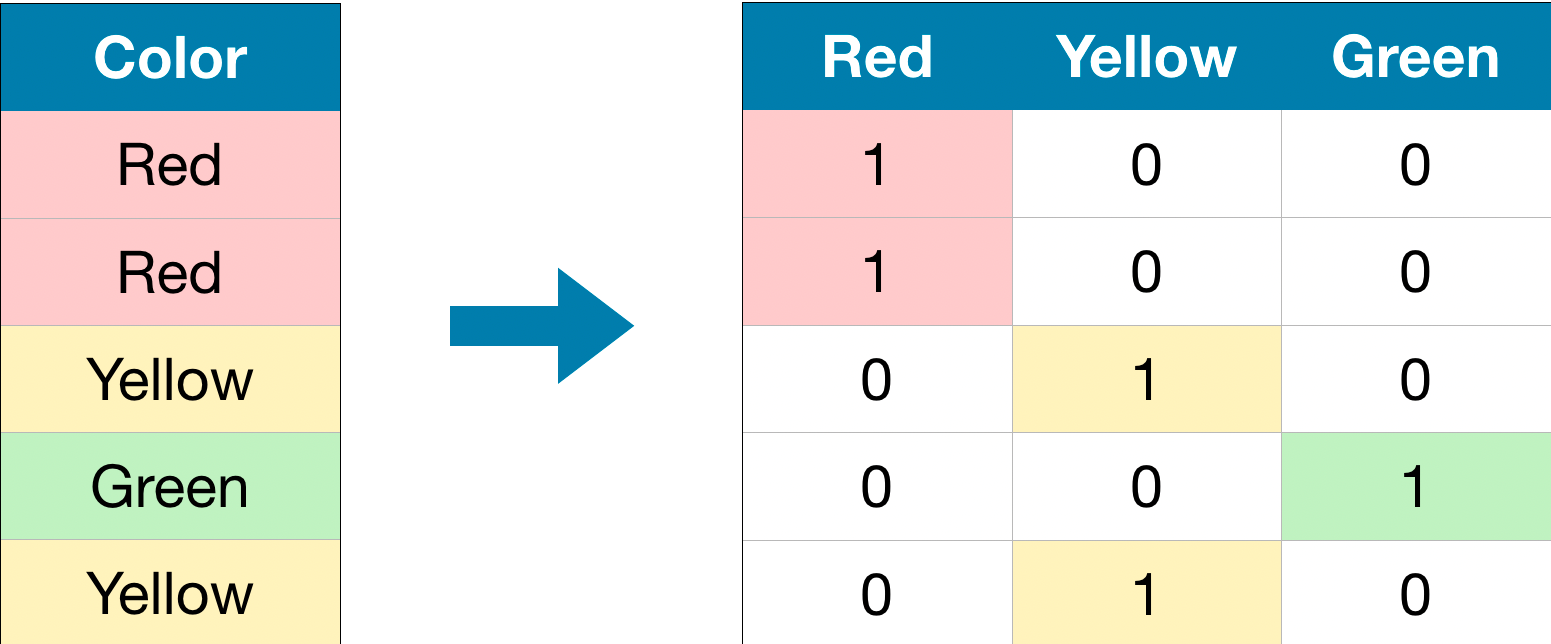

### Label encoder

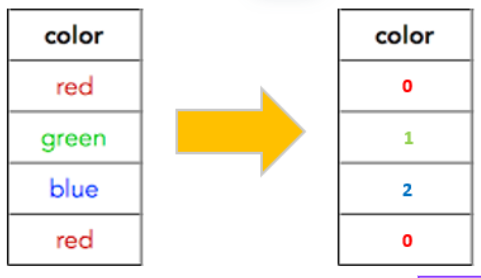

In [40]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold']

In [41]:
all_data[cols]

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,None,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,Reg,Y,Pave,None,Y,60,5,2008,2
1,TA,Gd,TA,TA,TA,TA,TA,Ex,None,TA,...,Gtl,Reg,Y,Pave,None,Y,20,8,2007,5
2,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,9
3,Gd,TA,Gd,TA,TA,TA,TA,Gd,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,70,5,2006,2
4,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,None,TA,TA,None,None,TA,TA,Gd,None,TA,...,Gtl,Reg,Y,Pave,None,Y,160,7,2006,6
2913,None,TA,TA,TA,TA,TA,TA,TA,None,TA,...,Gtl,Reg,Y,Pave,None,Y,160,5,2006,4
2914,TA,TA,TA,TA,TA,TA,TA,Ex,None,TA,...,Gtl,Reg,Y,Pave,None,Y,20,7,2006,9
2915,None,Gd,TA,None,None,TA,TA,TA,None,TA,...,Gtl,Reg,Y,Pave,None,Y,85,5,2006,7


In [42]:
from sklearn.preprocessing import LabelEncoder

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))


In [43]:
all_data[cols]

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,10,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,11,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3,4,4,3,3,3,4,2,3,3,...,0,3,2,1,1,1,2,6,0,8
2913,3,4,4,5,5,3,4,4,3,3,...,0,3,2,1,1,1,2,4,0,6
2914,5,4,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,6,0,11
2915,3,2,4,3,3,3,4,4,3,3,...,0,3,2,1,1,1,14,4,0,9


### 轉為 dummy變數

In [44]:
all_data_dummy = pd.get_dummies(all_data)

In [45]:
all_data_dummy

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,1,3,0,7,4,2003,...,False,False,False,True,False,False,False,False,True,False
1,5,80.0,9600,1,1,3,0,6,7,1976,...,False,False,False,True,False,False,False,False,True,False
2,10,68.0,11250,1,1,0,0,7,4,2001,...,False,False,False,True,False,False,False,False,True,False
3,11,60.0,9550,1,1,0,0,7,4,1915,...,False,False,False,True,True,False,False,False,False,False
4,10,84.0,14260,1,1,0,0,8,4,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2,21.0,1936,1,1,3,0,4,6,1970,...,False,False,False,True,False,False,False,False,True,False
2913,2,21.0,1894,1,1,3,0,4,4,1970,...,False,False,False,True,True,False,False,False,False,False
2914,5,160.0,20000,1,1,3,0,5,6,1960,...,False,False,False,True,True,False,False,False,False,False
2915,14,62.0,10441,1,1,3,0,5,4,1992,...,False,False,False,True,False,False,False,False,True,False


# 4. 模型建置
* 模型訓練前，把訓練資料及測試資料分好

In [46]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice_log.values
X_train = all_data_dummy[:ntrain].values
X_test = all_data_dummy[ntrain:].values

* 訓練資料需要切分訓練集、驗證集，使用cross validation技巧避免overfitting
* 資料的fold可以根據樣本數量去切分
* 建立衡量函數

In [47]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

## 4.1 模型訓練

### 4.1.1 回歸演算法

In [49]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring=rmse)
rmse_lr = -scores_lr.mean()
print("LinearRegression RMSE:", rmse_lr)

LinearRegression RMSE: 0.12861830032541416


### 4.1.2 Bagging樹演算法

In [50]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=kf, scoring=rmse)
rmse_dt = -scores_dt.mean()
print("DecisionTreeRegressor RMSE:", rmse_dt)

DecisionTreeRegressor RMSE: 0.20828632713938874


In [51]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model_rf = RandomForestRegressor(random_state=42)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kf, scoring=rmse)
rmse_rf = -scores_rf.mean()
print("RandomForestRegressor RMSE:", rmse_rf)

RandomForestRegressor RMSE: 0.13672282452562637


### 4.1.2 Boosting演算法

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
scores_gb = cross_val_score(model_gb, X_train, y_train, cv=kf, scoring=rmse)
rmse_gb = -scores_gb.mean()
print("GradientBoostingRegressor RMSE:", rmse_gb)

GradientBoostingRegressor RMSE: 0.12389405981803434


In [53]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=kf, scoring=rmse)
rmse_xgb = -scores_xgb.mean()
print("XGBRegressor RMSE:", rmse_xgb)

XGBRegressor RMSE: 0.13770692220429184


In [54]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(random_state=42)
scores_lgbm = cross_val_score(model_lgbm, X_train, y_train, cv=kf, scoring=rmse)
rmse_lgbm = -scores_lgbm.mean()
print("LGBMRegressor RMSE:", rmse_lgbm)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 139
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 141
[LightGBM] [Info] Start training from score 12.026498
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

## 4.3 演算法比較

In [55]:
# 整理結果
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_xgb, rmse_lgbm]
})

results.sort_values(by='RMSE', inplace=True)
results.reset_index(drop=True, inplace=True)
results


,Model,RMSE
0,Gradient Boosting,0.123894
1,LightGBM,0.128262
2,Linear Regression,0.128618
3,Random Forest,0.136723
4,XGBoost,0.137707
5,Decision Tree,0.208286


# 5. 模型預測與提交

## 5.1 提交訓練資料預測

In [56]:
model_lgbm = LGBMRegressor(random_state=42)
model_lgbm.fit(X_train, y_train)

predictions = model_lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 147
[LightGBM] [Info] Start training from score 12.024015


In [57]:
predictions = np.exp(predictions)
predictions

array([117457.92034895, 161076.44029968, 175797.87001742, ...,
       163002.32685335, 115847.81264472, 210664.29534531])

* 載入submission格式，取代掉預測的欄位內容

In [58]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index=False)

## 5.2 重新設計特徵工程及模型
* 增加一些新特徵
* 刪除不必要的特徵
* 演算法調參
* 使用stacking技巧

### 針對資料偏態做調整

In [59]:
from scipy.stats import norm, skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [60]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [61]:
all_data.shape

(2917, 79)

In [62]:
all_data_dummy = pd.get_dummies(all_data)
all_data_dummy

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.000000,2.440268,1.820334,14.187527,...,False,False,False,True,False,False,False,False,True,False
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.000000,2.259674,2.440268,14.145138,...,False,False,False,True,False,False,False,False,True,False
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.184404,...,False,False,False,True,False,False,False,False,True,False
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.047529,...,False,False,False,True,True,False,False,False,False,False
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.182841,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,...,False,False,False,True,False,False,False,False,True,False
2913,1.194318,3.932510,14.013314,0.730463,0.730463,1.540963,0.000000,1.820334,1.820334,14.135652,...,False,False,False,True,True,False,False,False,False,False
2914,2.055642,7.620056,22.782058,0.730463,0.730463,1.540963,0.000000,2.055642,2.259674,14.119786,...,False,False,False,True,True,False,False,False,False,False
2915,3.340760,5.744420,20.046557,0.730463,0.730463,1.540963,0.000000,2.055642,1.820334,14.170316,...,False,False,False,True,False,False,False,False,True,False


In [63]:
# 重新跑一次演算法
X_train = all_data_dummy[:ntrain].values
X_test = all_data_dummy[ntrain:].values

In [64]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgbm.fit(X_train, y_train)

predictions = model_lgbm.predict(X_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [65]:
predictions = np.exp(predictions)
submission = pd.read_csv('/content/sample_submission.csv')
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index=False)